In [1]:
# Importing libraries for working with DataFrames and visualizations
from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Importing the following for working with NILM dataset
from nilmtk.utils import print_dict
from nilmtk_contrib.disaggregate import Seq2Seq, Seq2Point
from nilmtk.api import API

plt.style.use('ggplot')

In [2]:
# Load model from pickle file
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
    return model

In [3]:
# Import the model
model = import_model('trained_models/1sec_99SL.pickle')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2024-04-21 17:35:22         4710
metadata.json                                  2024-04-21 17:35:22           64
variables.h5                                   2024-04-21 17:35:22      5409952
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\conv1d_3
......vars
.........0
.........1
...layers\conv1d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10


In [10]:
# Function to plot different model's prediction vs ground truth
def plot_result(model):
    plt.rcParams['figure.figsize'] = [15, 10]
    for i in model.gt_overall.columns:
        plt.figure()
        # plt.plot(model.test_mains[0],label='Mains reading')
        plt.plot(model.gt_overall[i],label='Truth')
        # for clf in model.pred_overall:                
        #     plt.plot(model.pred_overall[clf][i],label=clf)
        #     plt.xticks(rotation=90)
        plt.title(i)
        plt.legend()
    plt.show()

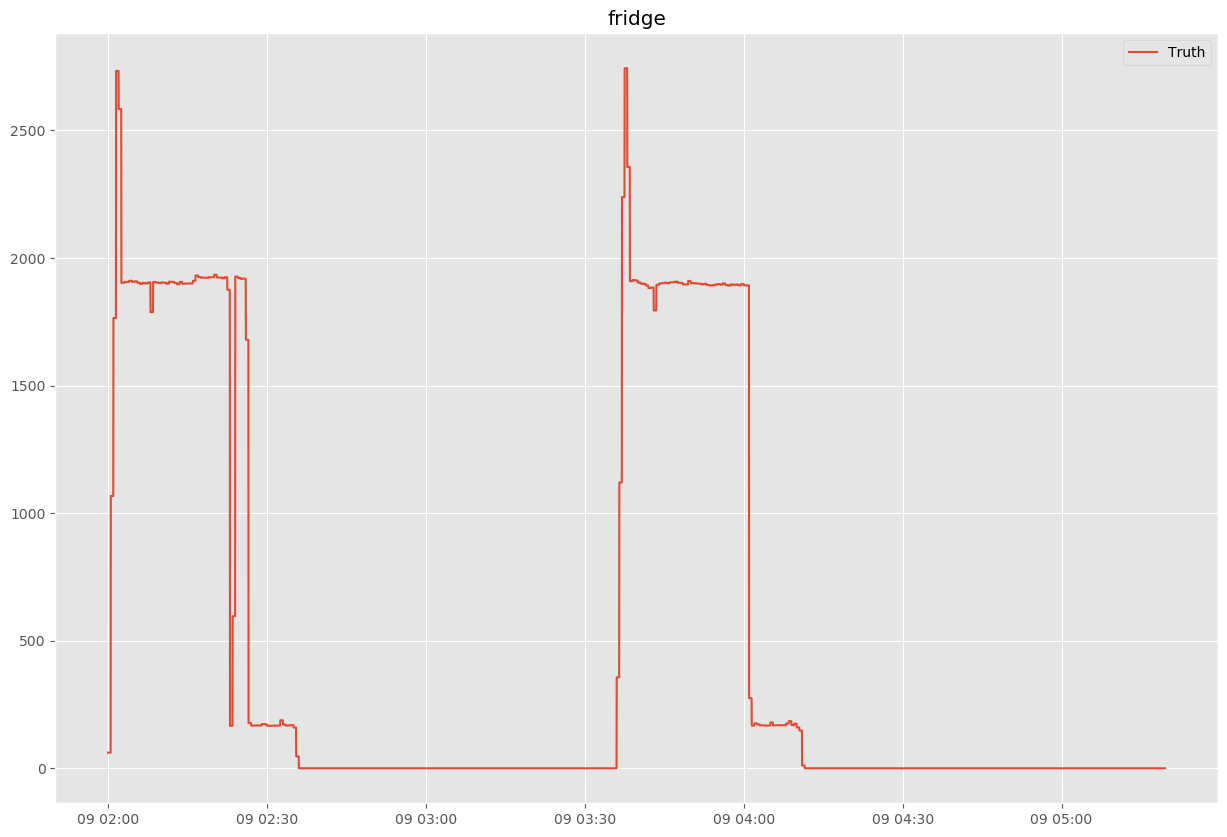

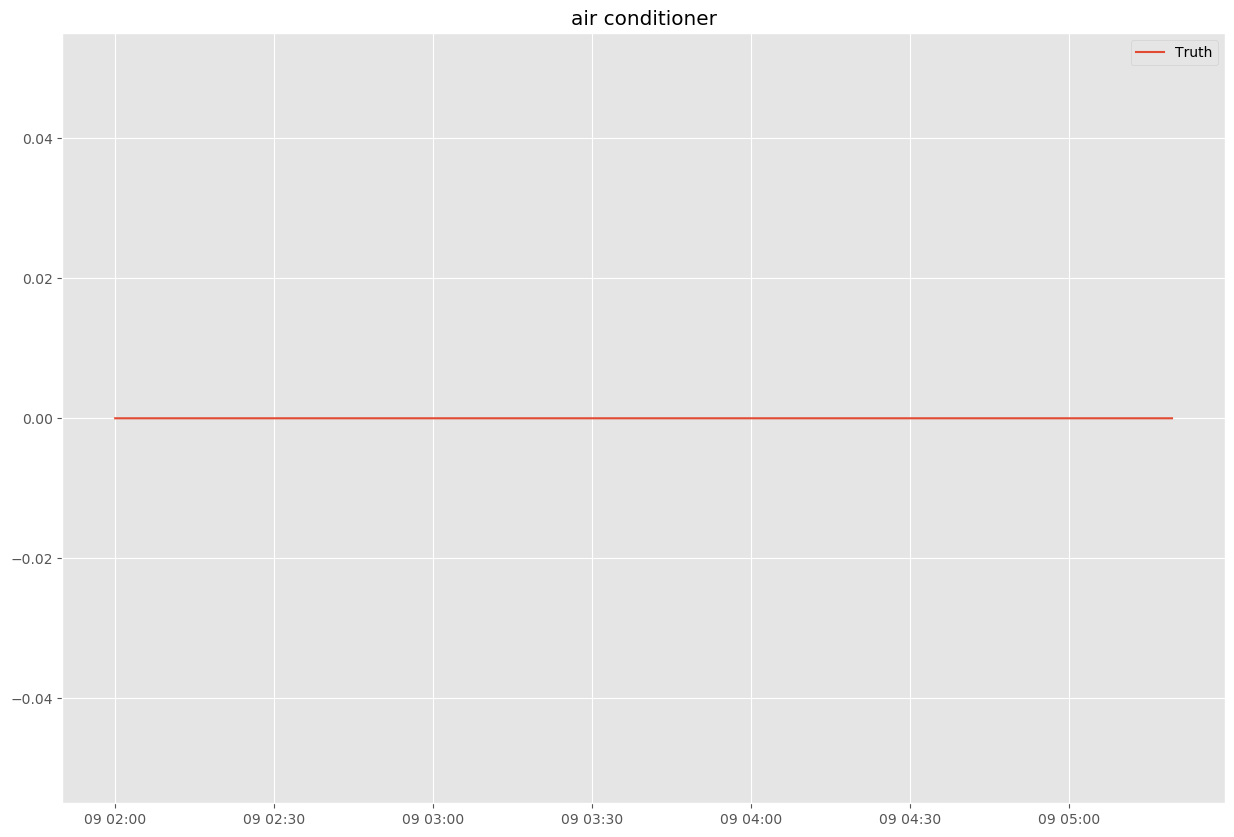

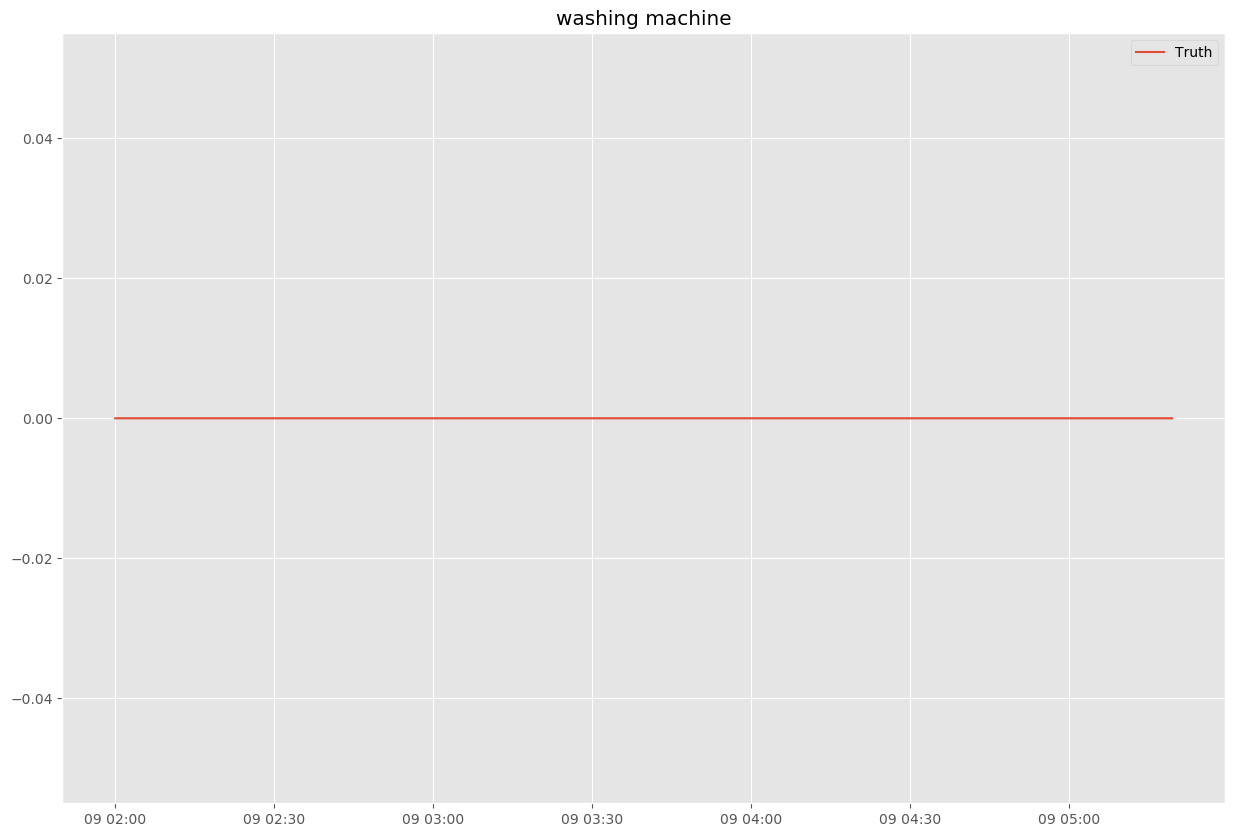

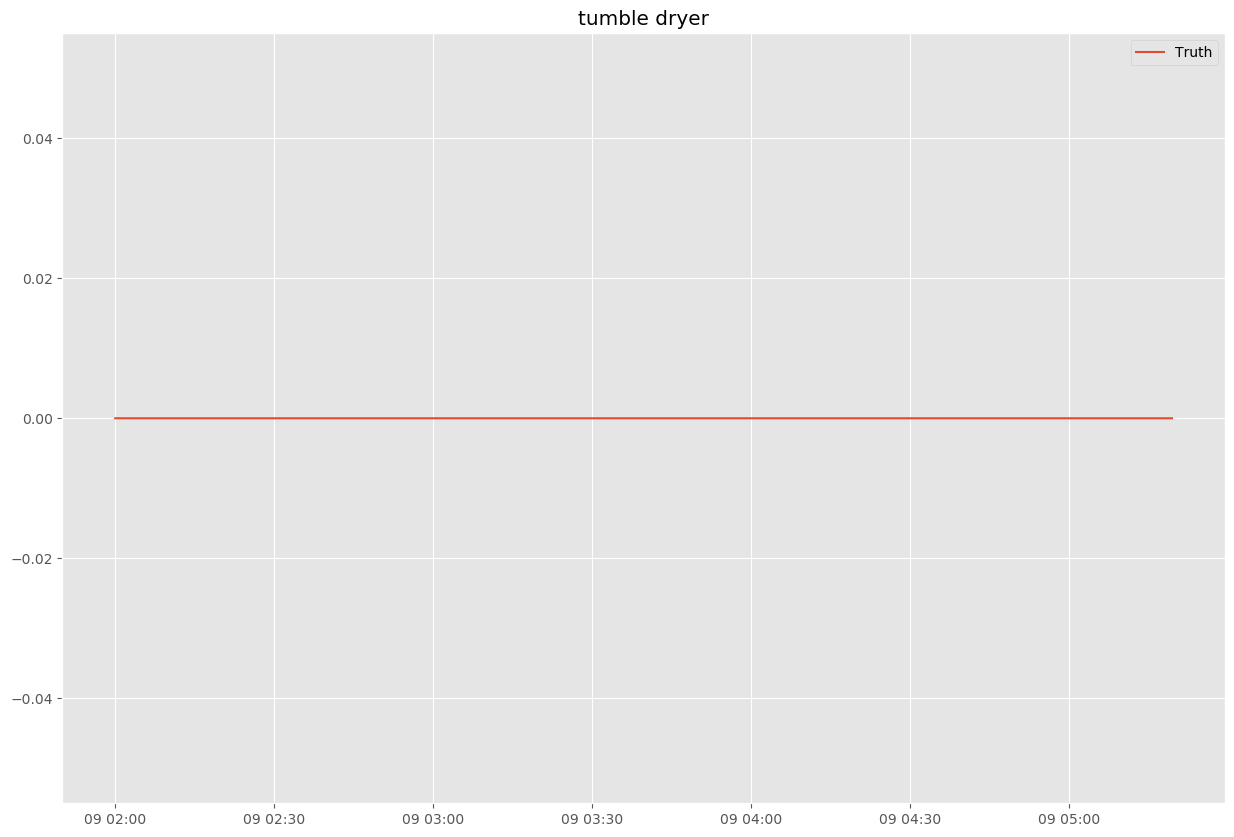

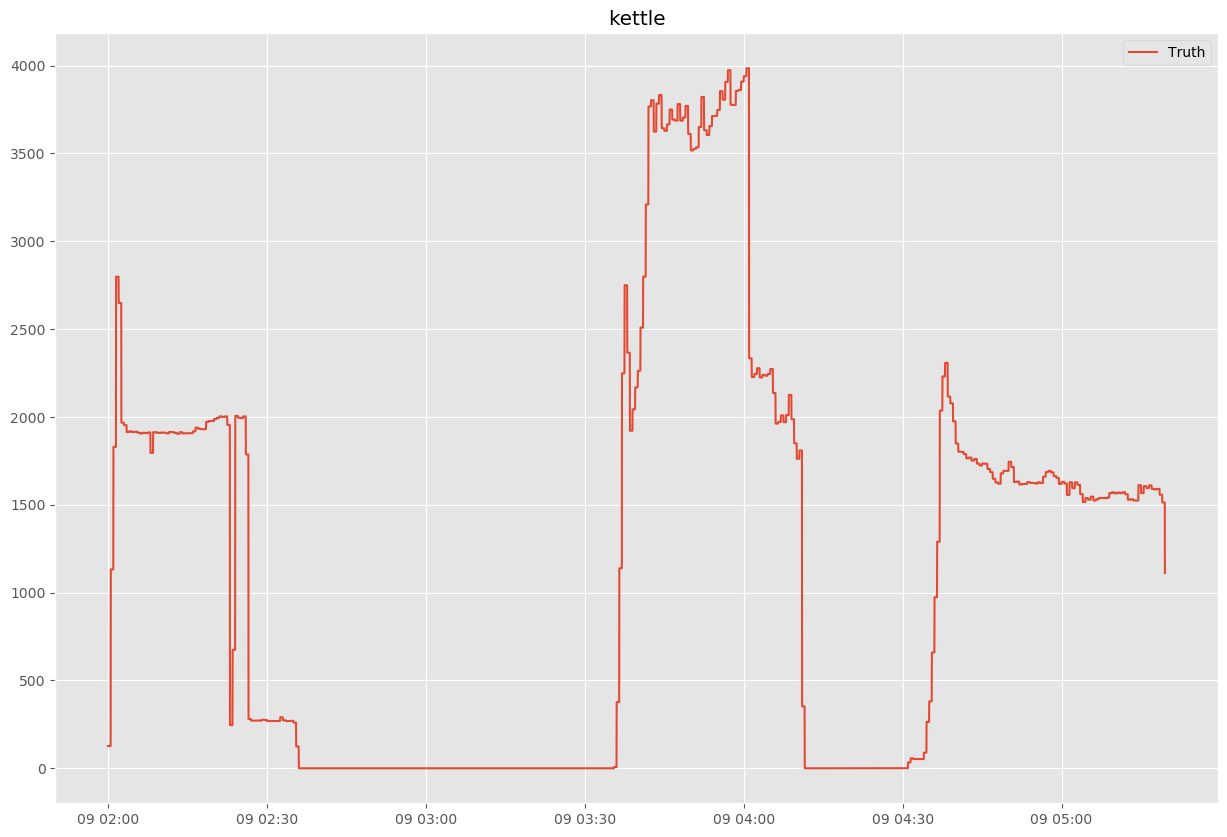

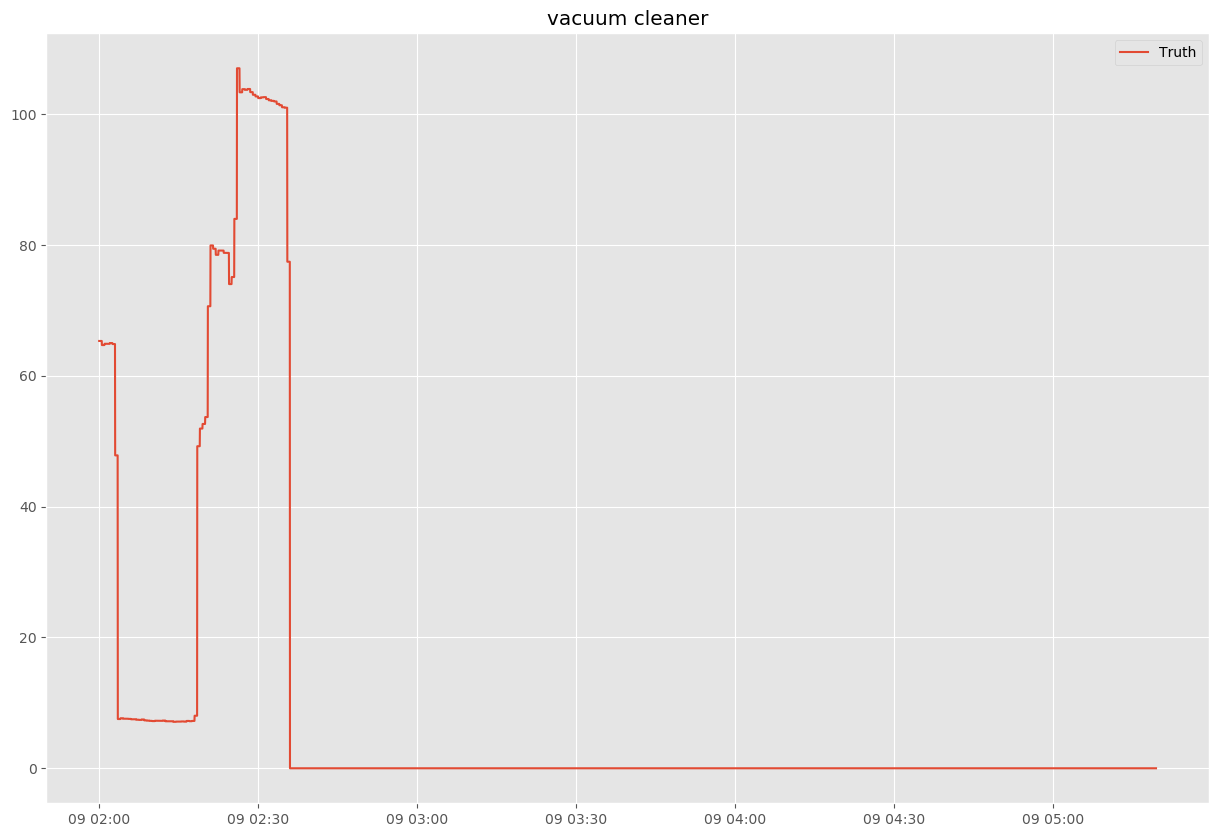

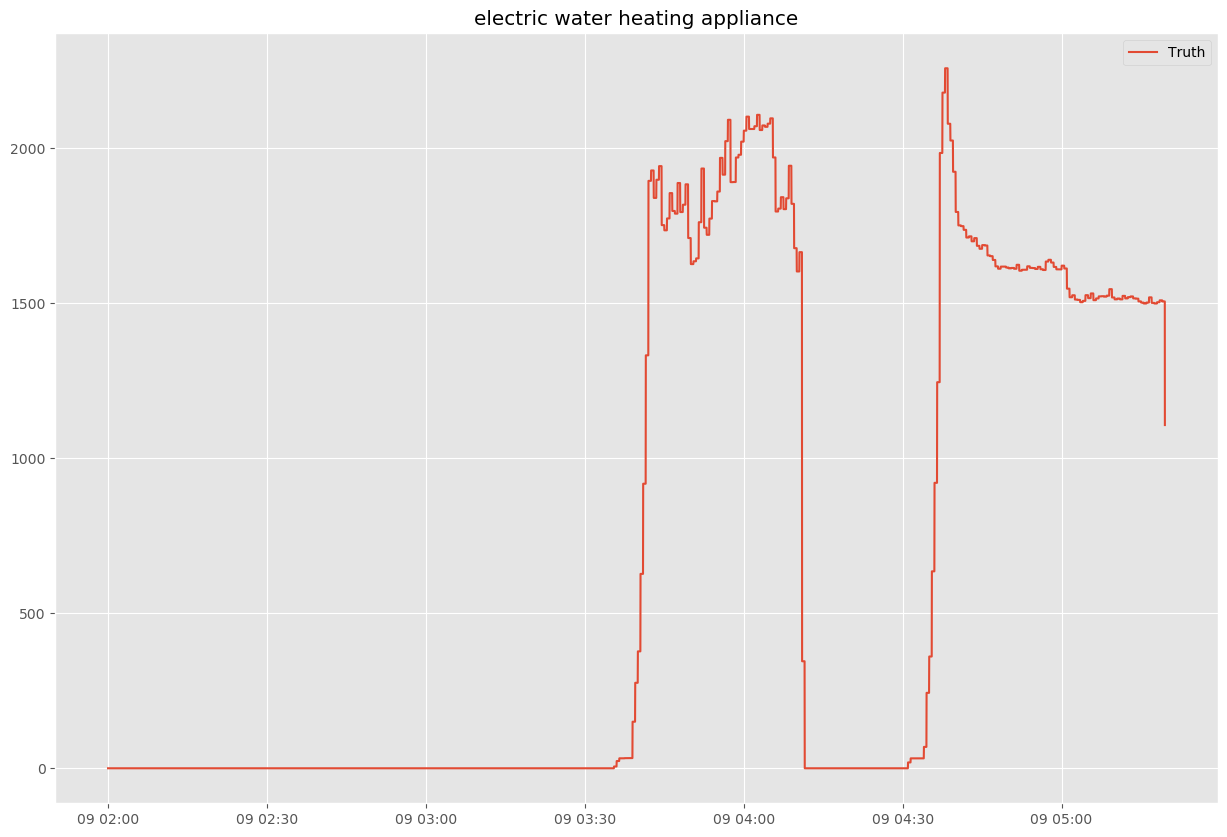

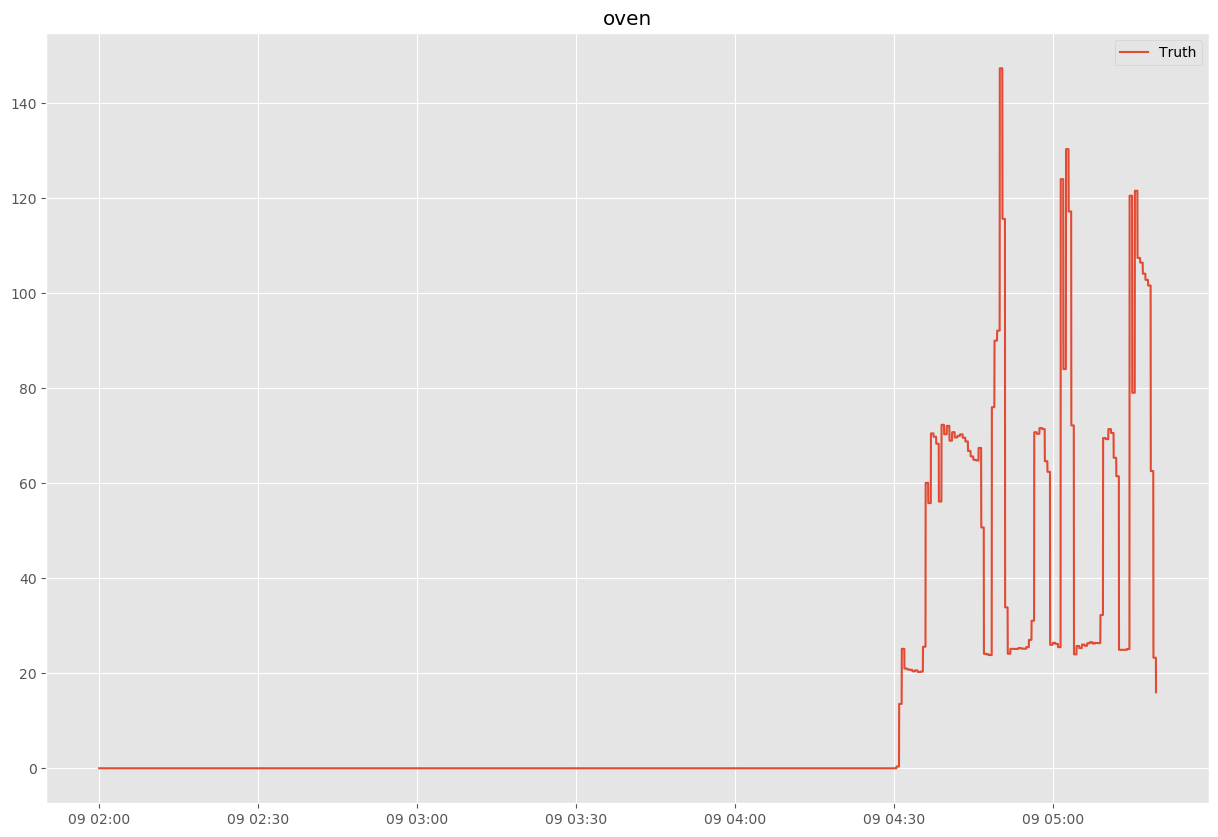

In [18]:
plot_result(model)

# model.gt_overall

Loading data for  test  dataset
Dropping missing values
Generating predictions for : Seq2Seq
24/24 [==============================] - 1s 20ms/step
Generating predictions for : Seq2Point
24/24 [==============================] - 2s 59ms/step
............  mae  ..............
                                     Seq2Seq  Seq2SPoint
fridge                            173.881256  189.206329
air conditioner                    16.962103   19.267683
washing machine                    51.558170   63.600300
tumble dryer                       13.642251   13.749081
kettle                             44.797916   27.502855
vacuum cleaner                     19.428268   19.744478
electric water heating appliance  229.960815  250.213974
oven                               18.306044   17.566916
............  rmse  ..............
                                     Seq2Seq  Seq2SPoint
fridge                            415.872764  454.103564
air conditioner                    22.201393   27.582759
washing

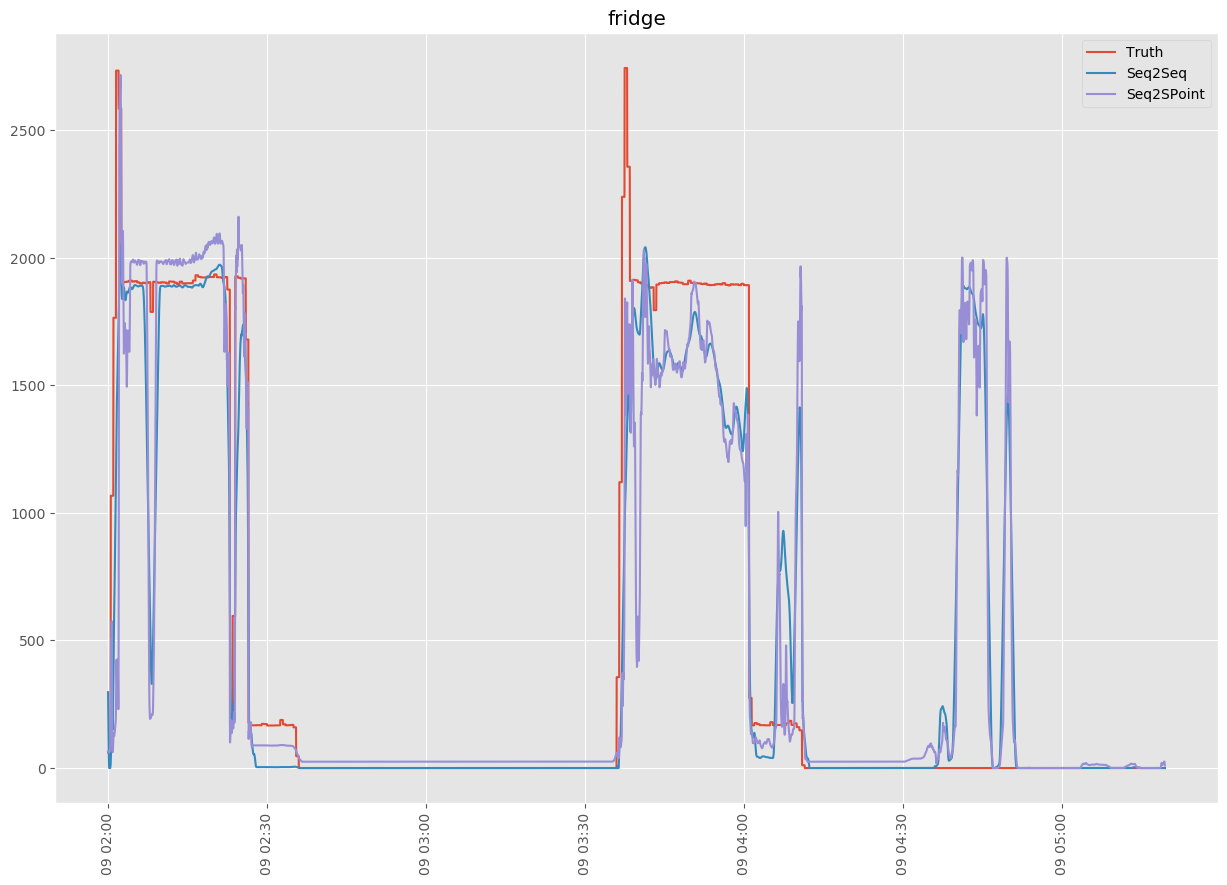

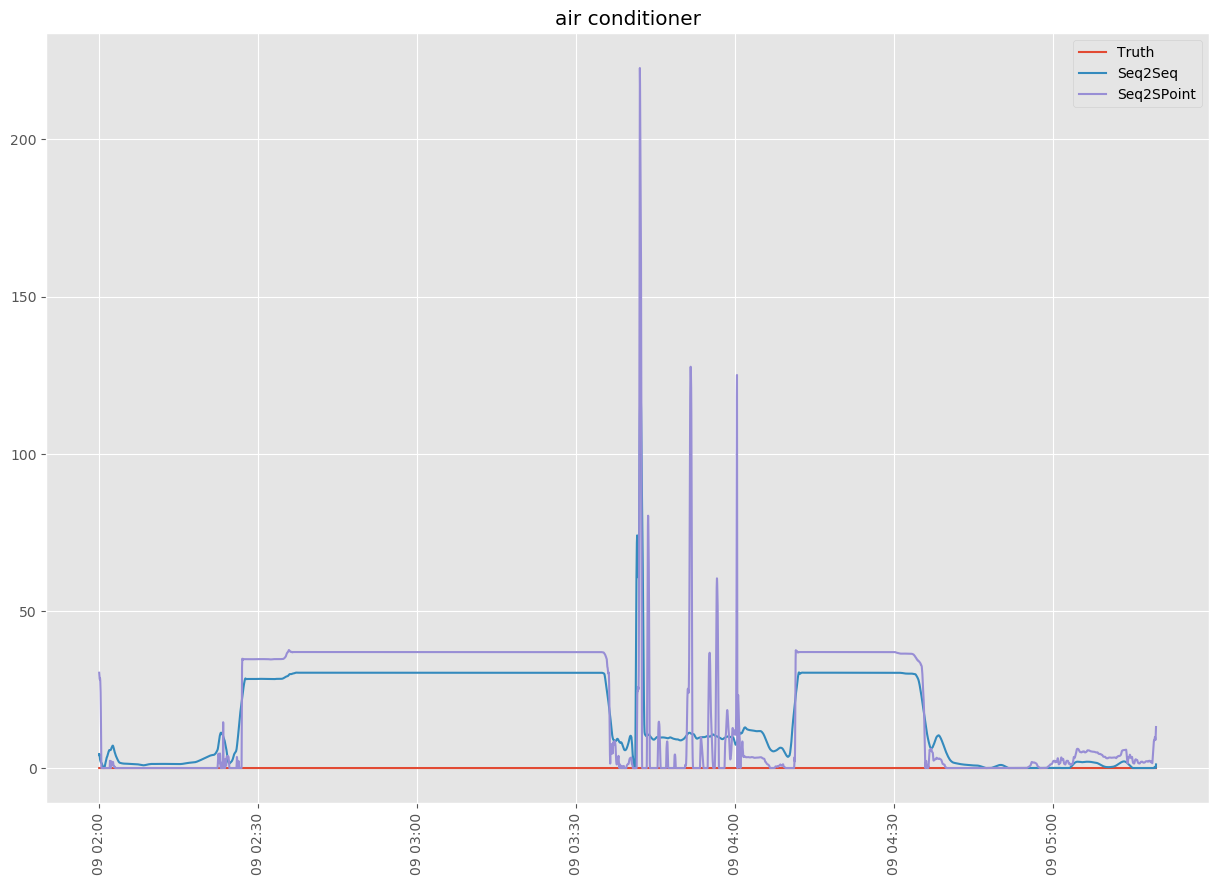

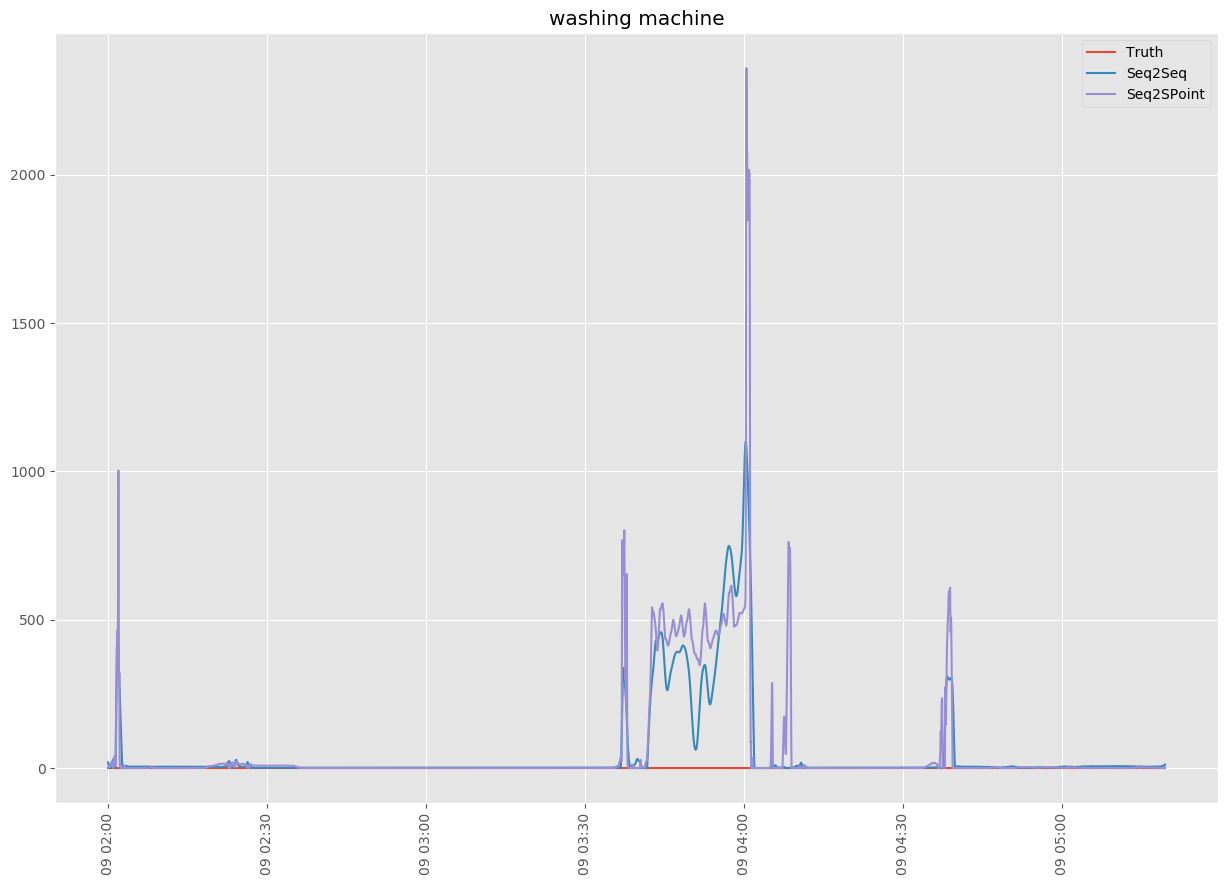

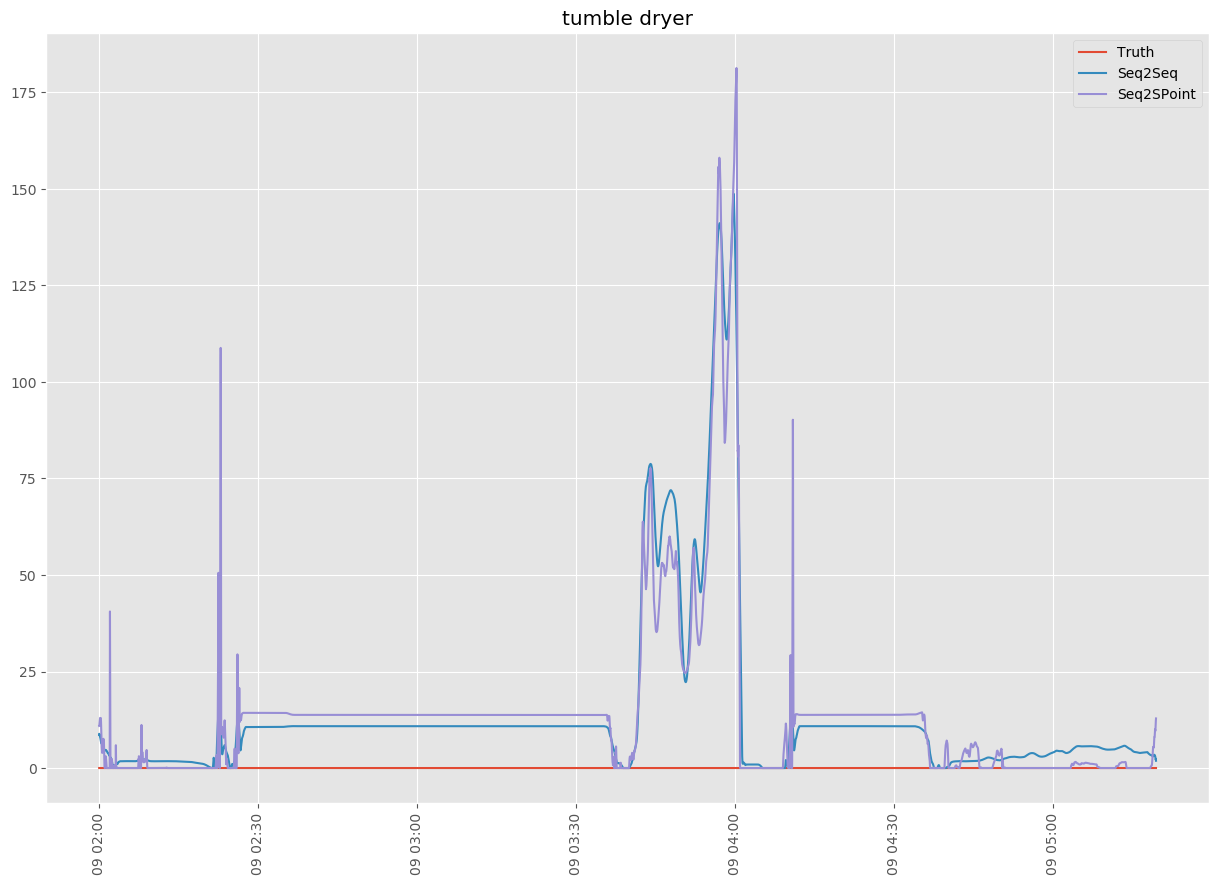

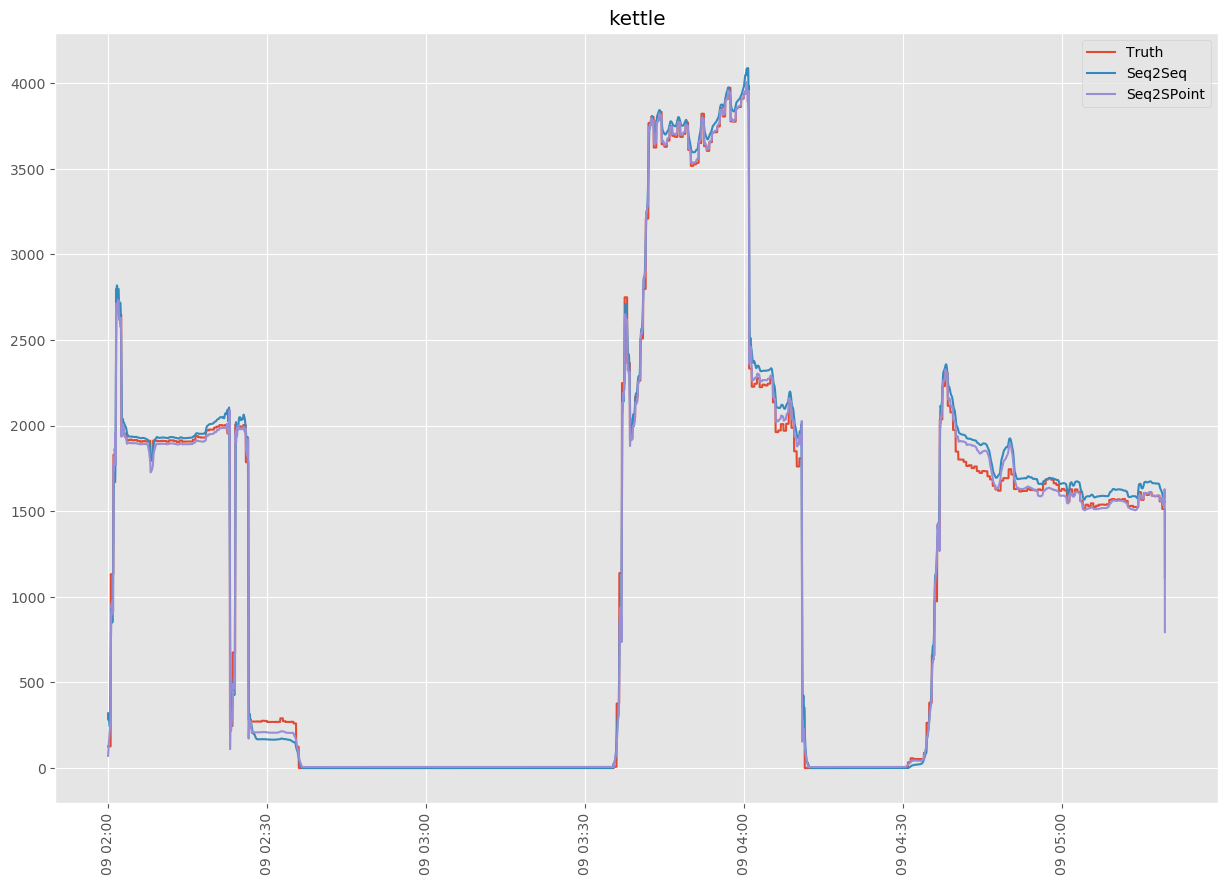

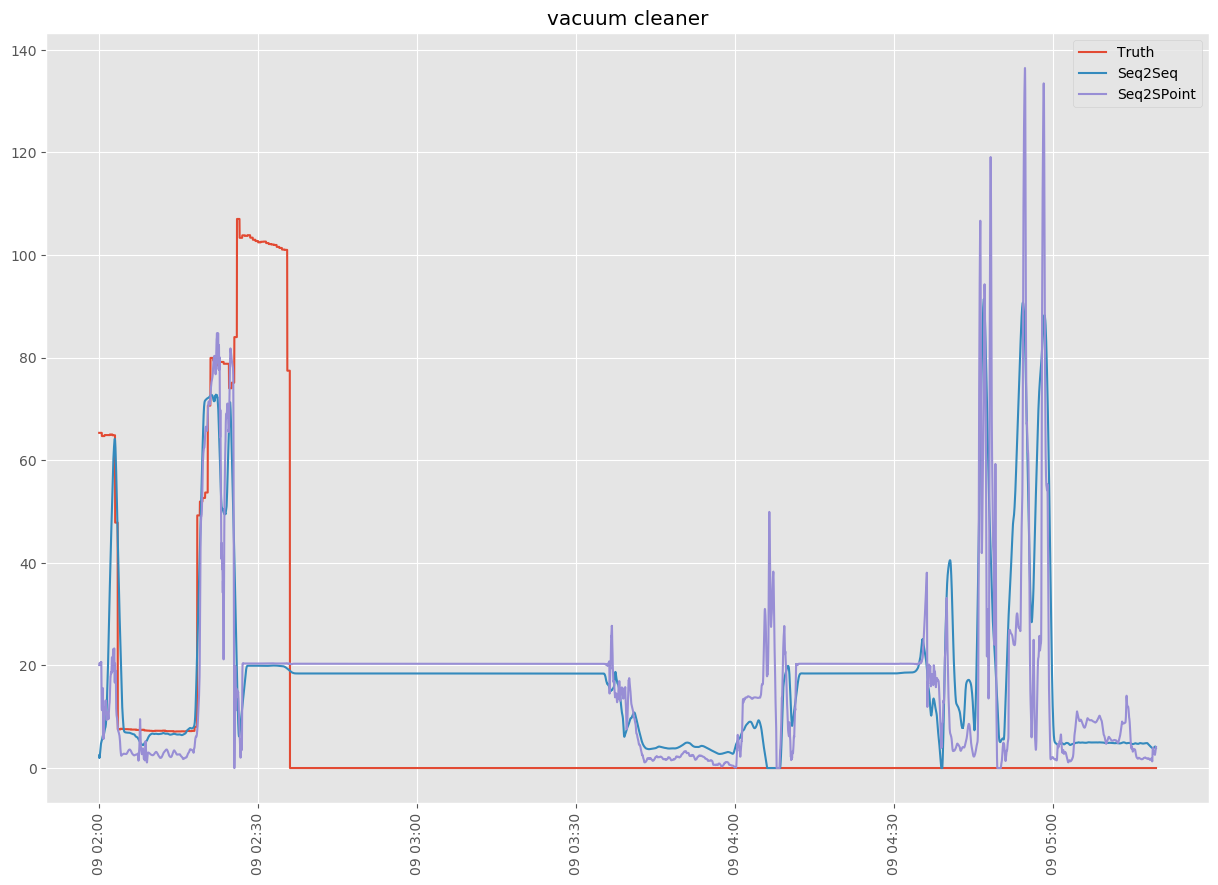

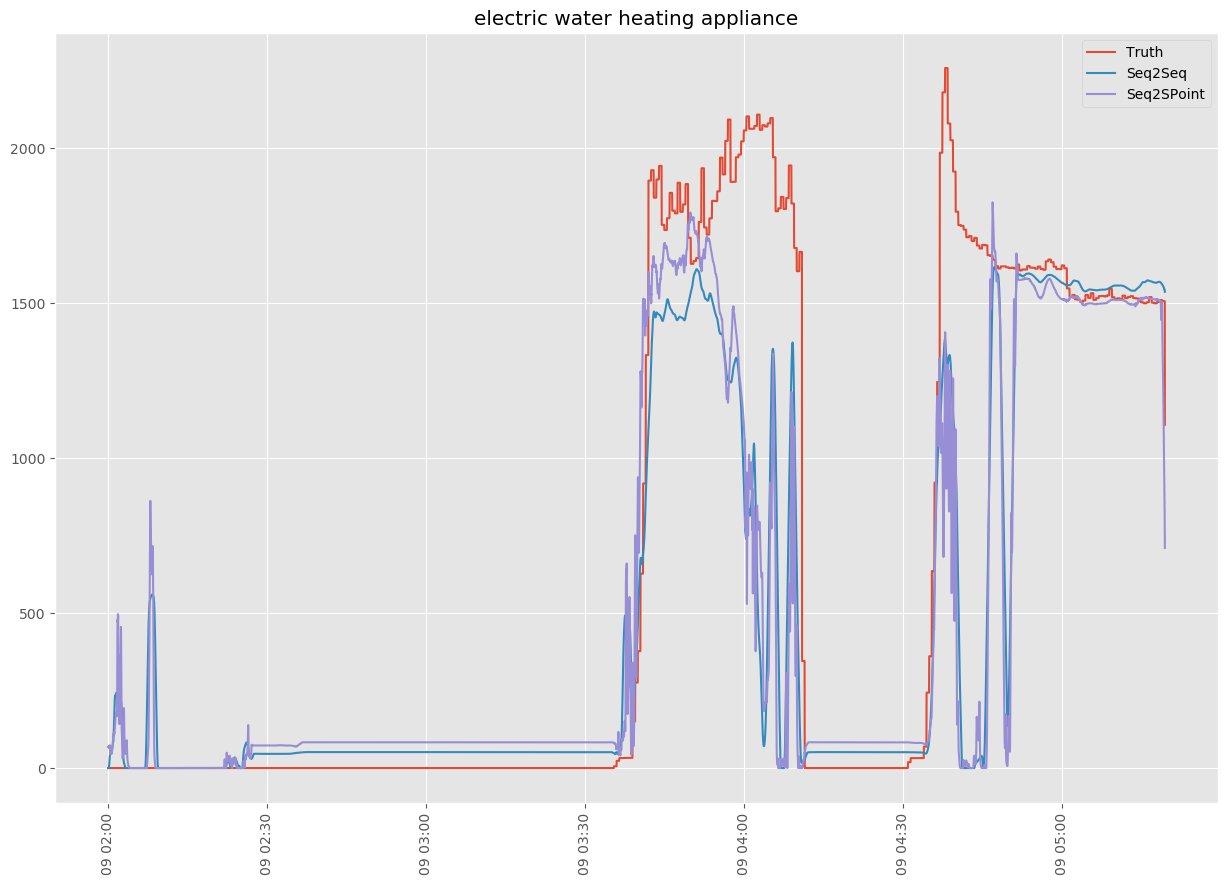

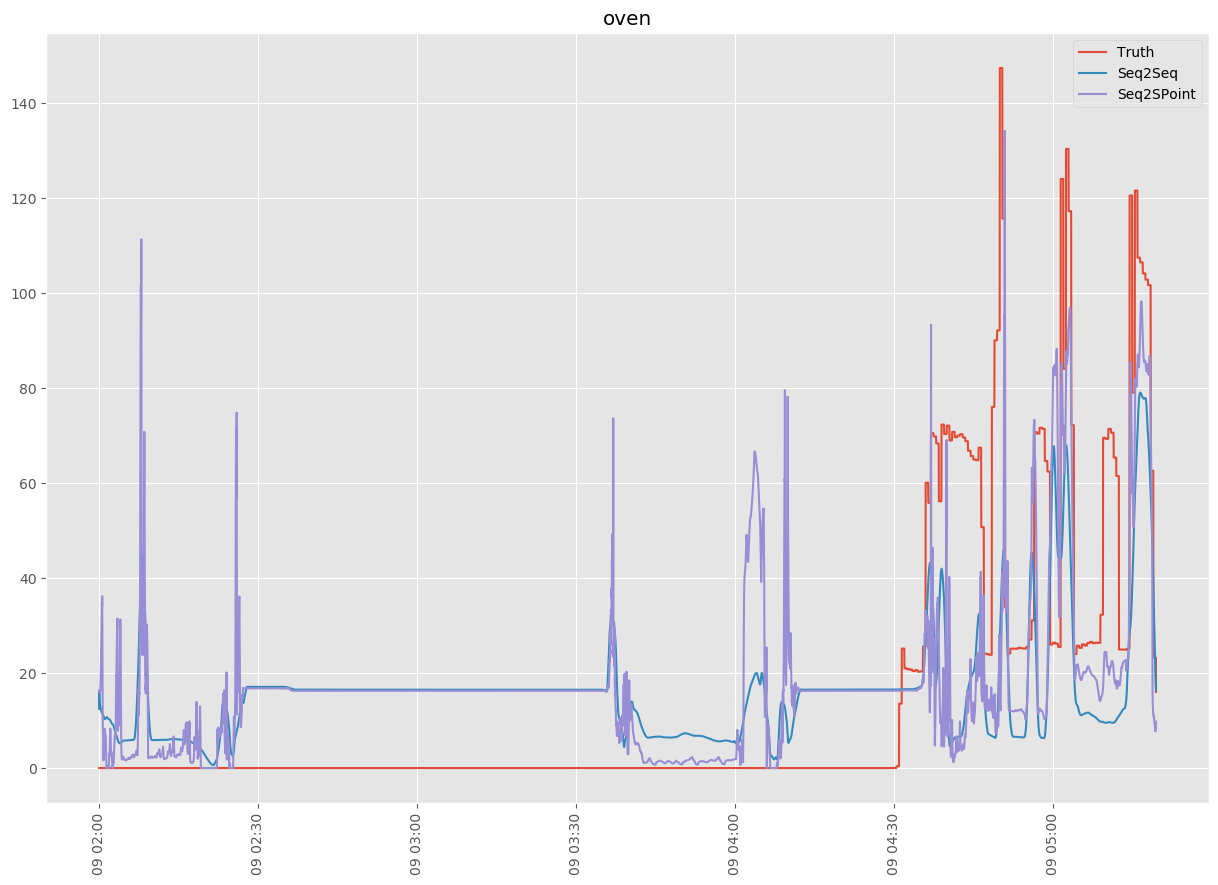

In [7]:
test_params = {
    'path': 'data/mimos_1_sec.h5',
    'buildings': {
        # 1: {
        #     'start_time': '2022-09-27',
        #     'end_time': '2022-09-28'
        # },
        # 2: {
        #     'start_time': '2022-09-29',
        #     'end_time': '2022-09-30'
        # },
        # 3: {
        #     'start_time': '2022-11-01',
        #     'end_time': '2022-11-02'
        # },
        # 4: {
        #     'start_time': '2022-11-07',
        #     'end_time': '2022-11-08'
        # },
        5: {
            'start_time': '2022-11-08',
            'end_time': '2022-11-09'
        },
        # 6: {
        #     'start_time': '2022-11-09',
        #     'end_time': '2022-11-10'
        # },
        # 7: {
        #     'start_time': '2022-11-10',
        #     'end_time': '2022-11-11'
        # }
    }
}

model.test_jointly({'test': test_params})